In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
url = 'NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

In [13]:
training_set.shape

(2035, 1)

In [4]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
X_train.shape

(1975, 60, 1)

In [10]:
X_train[1]

array([[0.62226277],
       [0.64436334],
       [0.61719384],
       [0.61820762],
       [0.62408759],
       [0.62793998],
       [0.63584753],
       [0.61658556],
       [0.57725061],
       [0.54845904],
       [0.57339822],
       [0.57339822],
       [0.56731549],
       [0.57948094],
       [0.57137064],
       [0.63706407],
       [0.62814274],
       [0.63219789],
       [0.62550689],
       [0.61942417],
       [0.63219789],
       [0.61111111],
       [0.62206002],
       [0.64557989],
       [0.67234388],
       [0.66058394],
       [0.64760746],
       [0.6283455 ],
       [0.62408759],
       [0.61597729],
       [0.63341444],
       [0.63077859],
       [0.63321168],
       [0.64841849],
       [0.62469586],
       [0.62814274],
       [0.61394972],
       [0.67964315],
       [0.65815085],
       [0.6593674 ],
       [0.64841849],
       [0.62773723],
       [0.67883212],
       [0.66058394],
       [0.63990268],
       [0.60888078],
       [0.6431468 ],
       [0.678

## Creating the LSTM Model

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Using TensorFlow backend.


In [15]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0144
Epoch 2/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0029
Epoch 3/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 4/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0025
Epoch 5/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0023
Epoch 6/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0024
Epoch 7/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0027
Epoch 8/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0018
Epoch 9/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0020
Epoch 10/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0018
Epoch 11/100
1975/1975 [==============================] - 5s 2ms/step - loss: 0.0019
Epoch 12/100
1975/1975 [==============================] - 5s 2ms/step - lo

Epoch 95/100
1975/1975 [==============================] - 4s 2ms/step - loss: 6.6009e-04
Epoch 96/100
1975/1975 [==============================] - 4s 2ms/step - loss: 6.8306e-04
Epoch 97/100
1975/1975 [==============================] - 4s 2ms/step - loss: 7.2676e-04
Epoch 98/100
1975/1975 [==============================] - 5s 2ms/step - loss: 5.7432e-04
Epoch 99/100
1975/1975 [==============================] - 5s 2ms/step - loss: 5.5848e-04
Epoch 100/100
1975/1975 [==============================] - 4s 2ms/step - loss: 7.2131e-04


### Making Predictions on the Test Set

In [16]:
url = 'tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

In [18]:
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])

In [19]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [20]:
predicted_stock_price = model.predict(X_test)

In [21]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

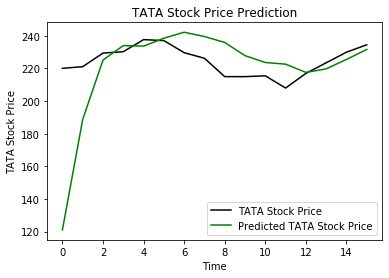

In [22]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()